# Import Library


In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [57]:
import warnings

warnings.filterwarnings('ignore')

# Import Dataset

In [58]:
data = pd.read_csv("bank-additional-full.csv",sep=";")
test_data = pd.read_csv("bank-additional.csv",sep=";")

# Exploratory data analysis

> Girintili blok



In [59]:
data.shape

(41188, 21)

In [60]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Marital Feutere Analyzing

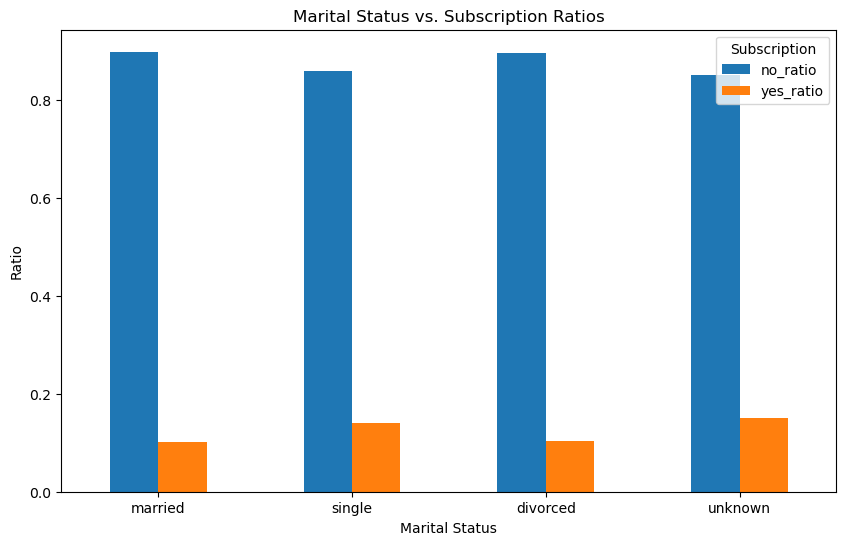

In [61]:
# Kategorik özellikler için kategori listesi
marital_categories = data['marital'].unique()

# Her bir kategori için oranları hesaplamak ve depolamak için boş bir liste oluşturun
category_ratios = []

# Her bir kategori için oranları hesaplayın ve listeye ekleyin
for category in marital_categories:
    subset = data[data['marital'] == category]
    category_no_ratio = subset['y'].value_counts(normalize=True).get(0, 0)
    category_yes_ratio = subset['y'].value_counts(normalize=True).get(1, 0)
    category_ratios.append({'marital_category': category, 'no_ratio': category_no_ratio, 'yes_ratio': category_yes_ratio})

# Oranları içeren DataFrame'i oluşturun
ratios_df = pd.DataFrame(category_ratios)

# Grafik çizin
ratios_df.plot(kind='bar', x='marital_category', figsize=(10, 6))
plt.title('Marital Status vs. Subscription Ratios')
plt.xlabel('Marital Status')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.legend(title='Subscription')
plt.show()

### All Ratio of Feature

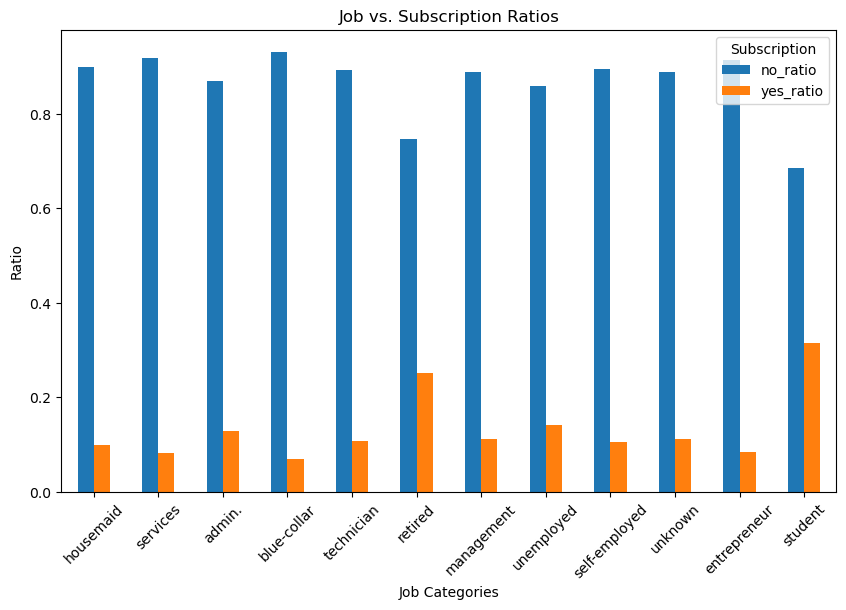

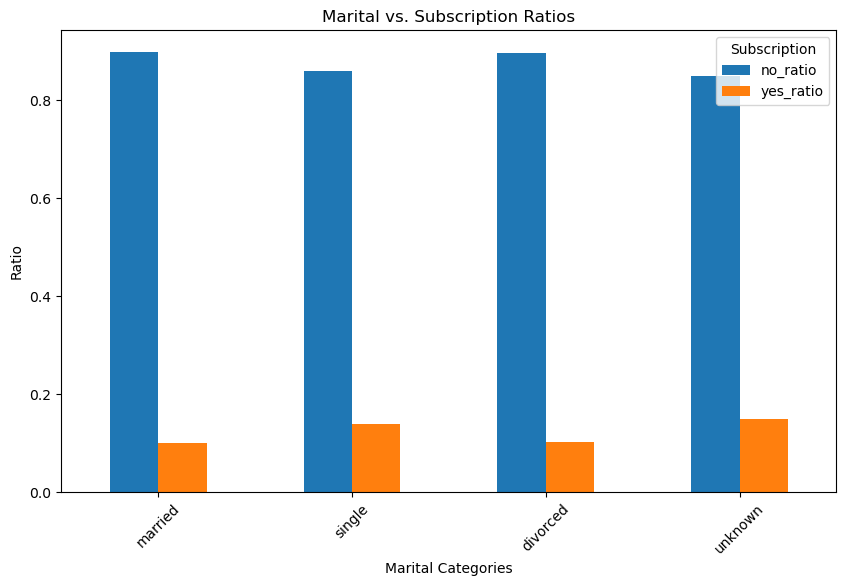

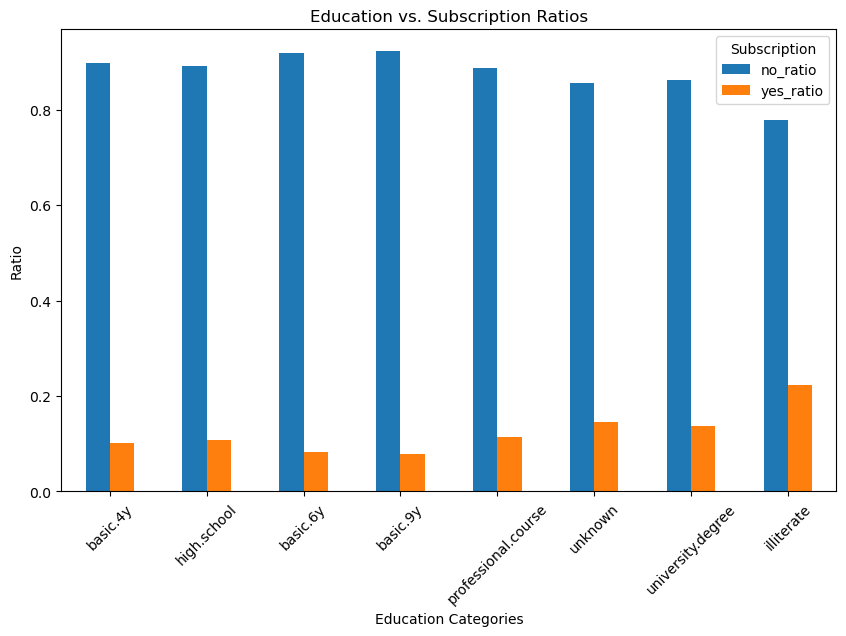

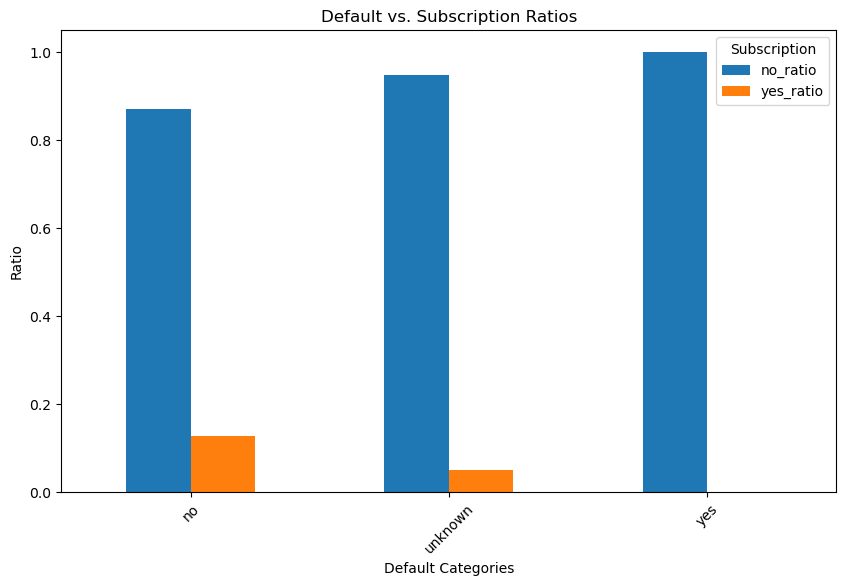

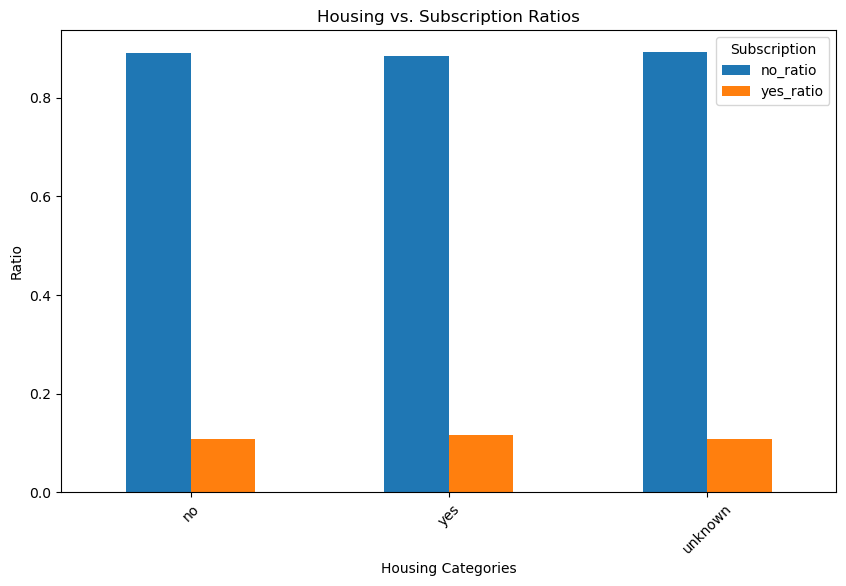

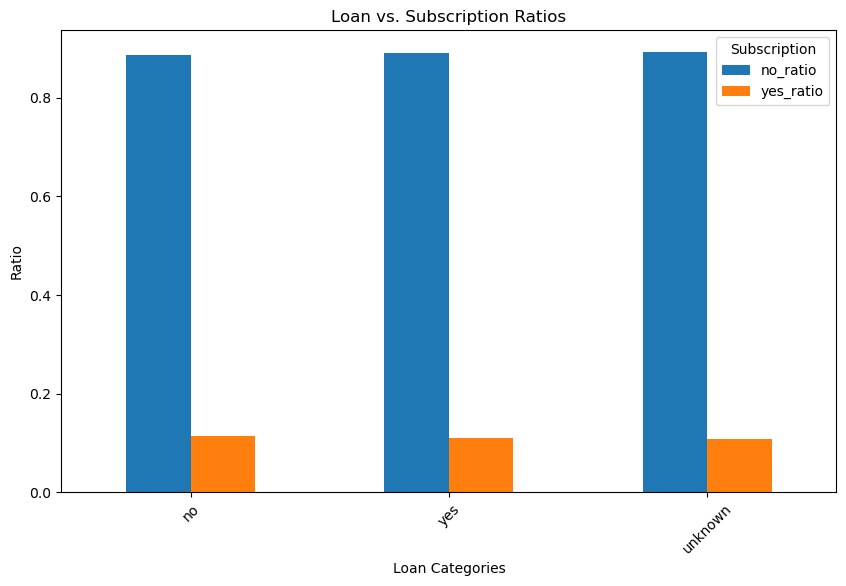

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Kategorik özellikler ve kategoriler
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Her bir kategori için oranları hesaplamak ve depolamak için boş bir liste oluşturun
category_ratios = []

# Her bir özellik için döngü
for feature in categorical_features:
    categories = data[feature].unique()

    # Her bir kategori için oranları hesaplayın ve listeye ekleyin
    for category in categories:
        subset = data[data[feature] == category]
        category_no_ratio = subset['y'].value_counts(normalize=True).get(0, 0)
        category_yes_ratio = subset['y'].value_counts(normalize=True).get(1, 0)
        category_ratios.append({'feature': feature, 'category': category, 'no_ratio': category_no_ratio, 'yes_ratio': category_yes_ratio})

# Oranları içeren DataFrame'i oluşturun
ratios_df = pd.DataFrame(category_ratios)

# Grafik çizin
for feature in categorical_features:
    subset_df = ratios_df[ratios_df['feature'] == feature]
    subset_df.plot(kind='bar', x='category', y=['no_ratio', 'yes_ratio'], figsize=(10, 6))
    plt.title(f'{feature.capitalize()} vs. Subscription Ratios')
    plt.xlabel(f'{feature.capitalize()} Categories')
    plt.ylabel('Ratio')
    plt.xticks(rotation=0)
    plt.legend(title='Subscription')
    plt.xticks(rotation=45)
    plt.show()


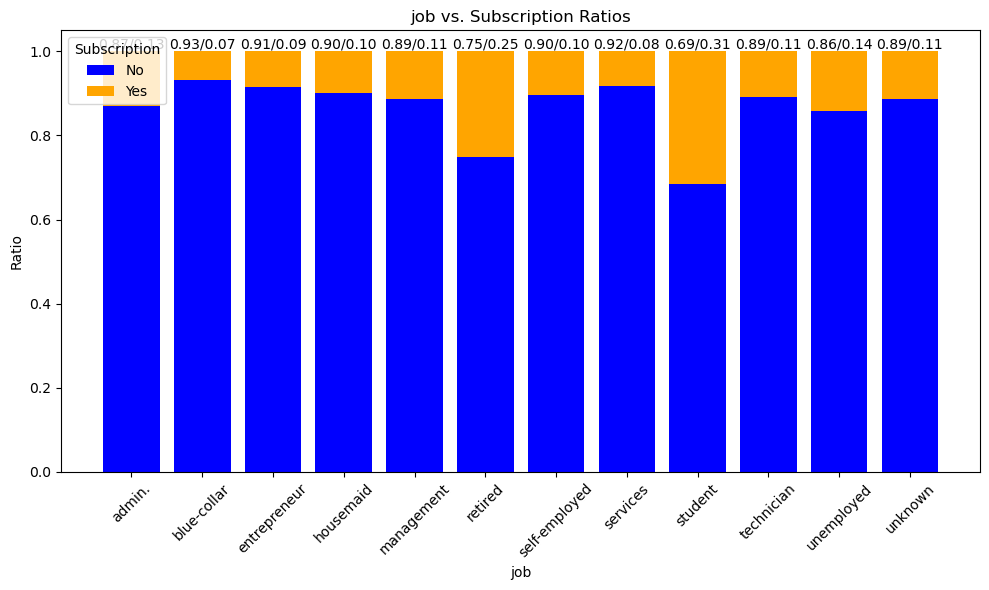

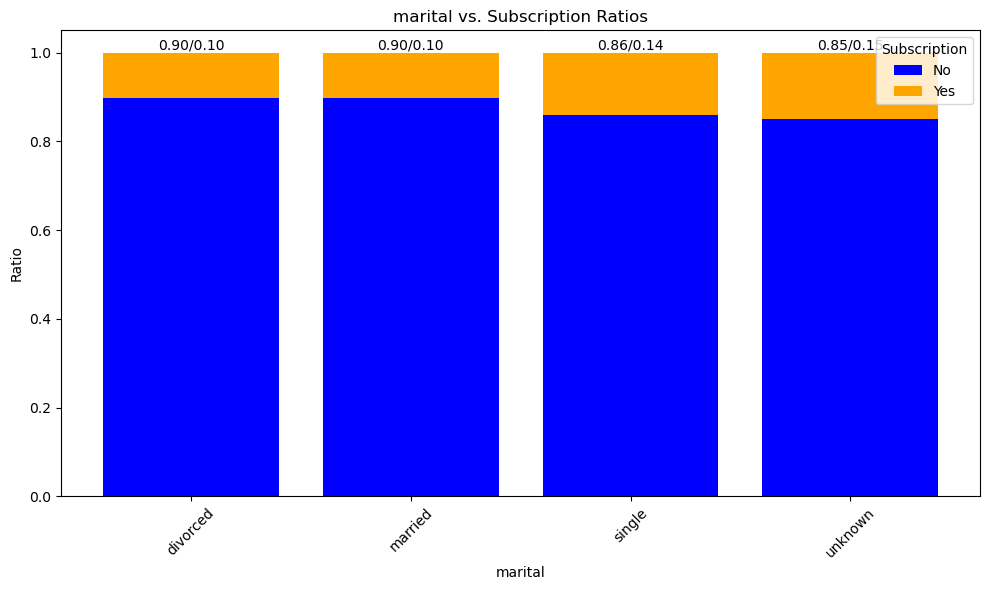

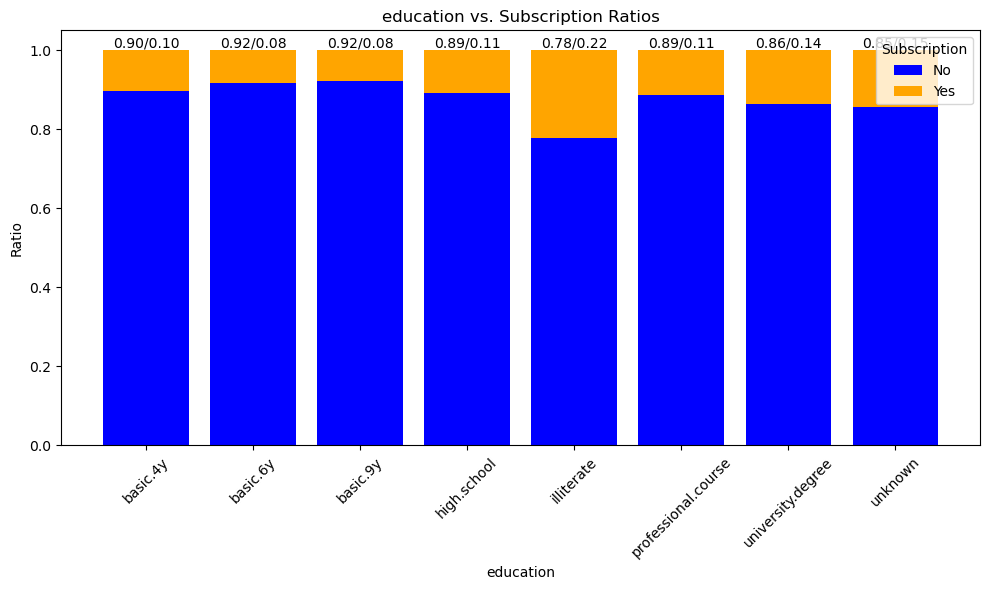

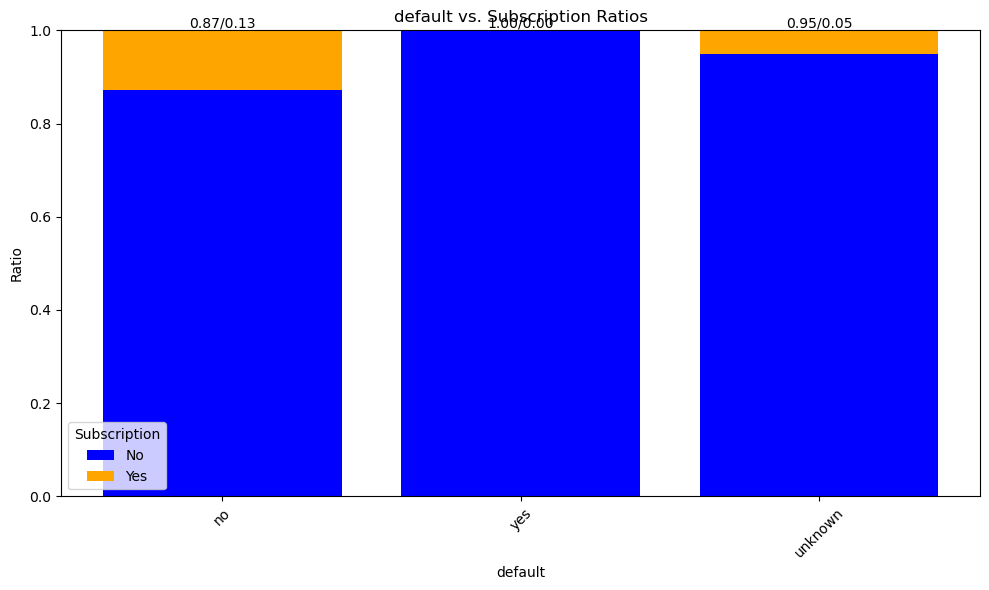

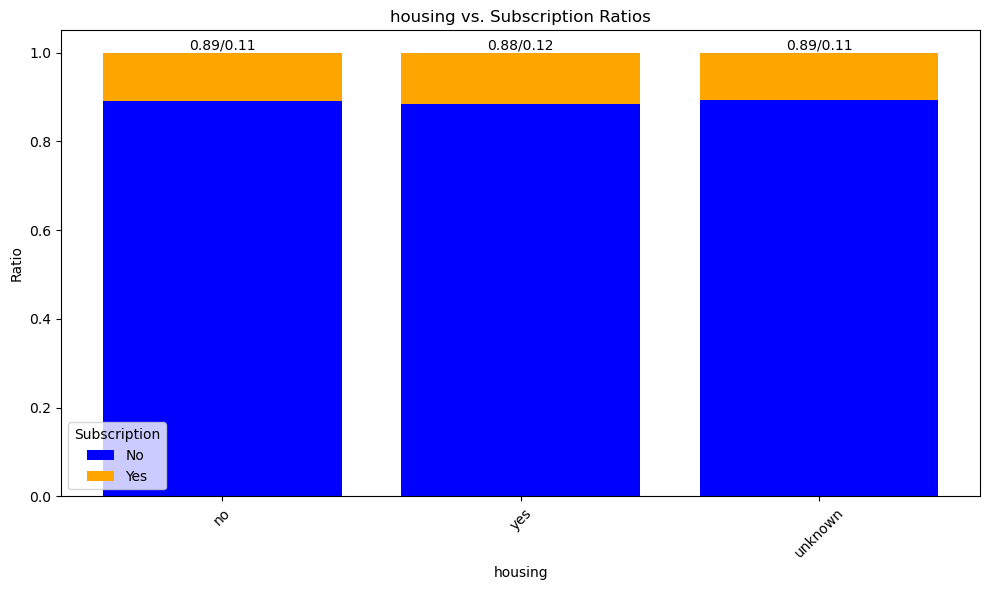

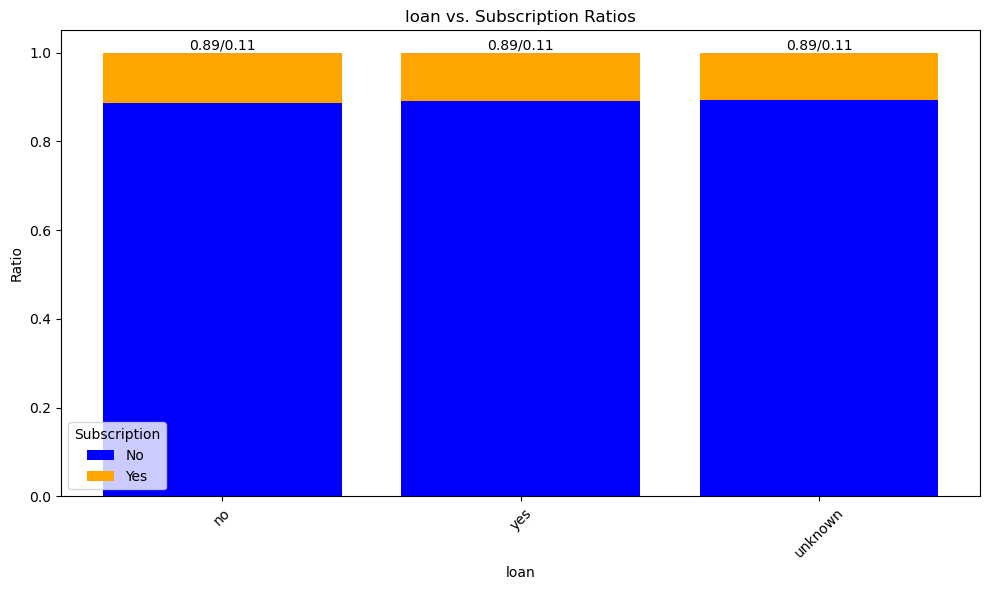

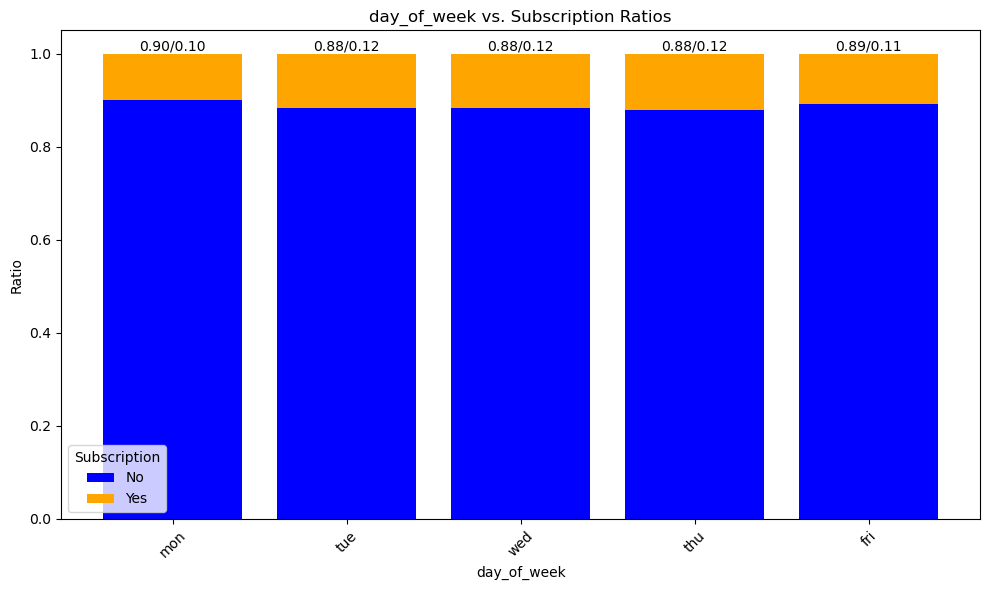

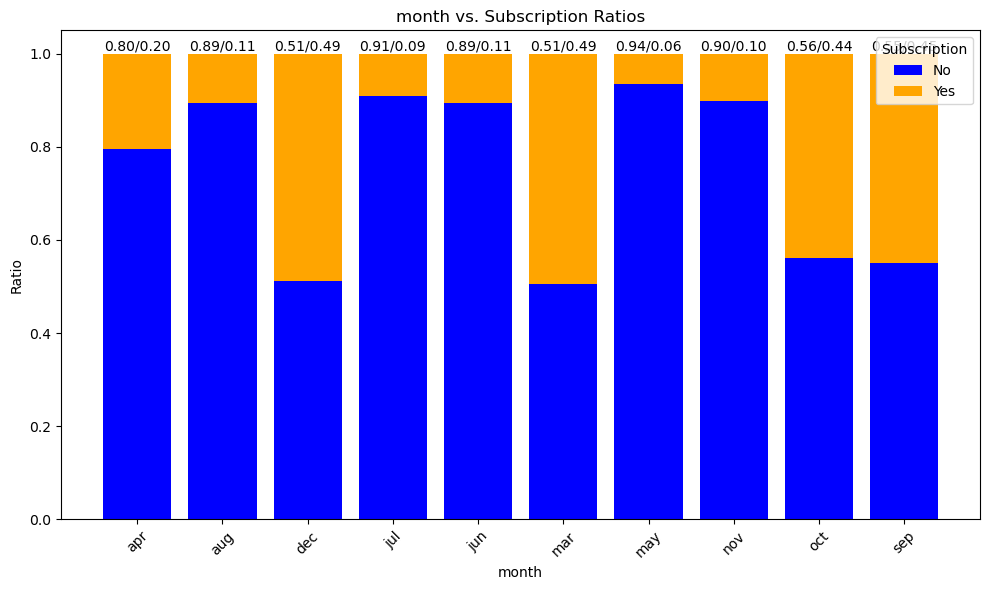

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Kategorik özellikler ve kategorilerin listesi
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan','day_of_week','month']
categories = {
    'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'],
    'marital': ['divorced', 'married', 'single', 'unknown'],
    'education': ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'],
    'default': ['no', 'yes', 'unknown'],
    'housing': ['no', 'yes', 'unknown'],
    'loan': ['no', 'yes', 'unknown'],
    'day_of_week': ['mon','tue','wed','thu','fri'],
    'month': ['apr','aug','dec','jul','jun','mar','may','nov','oct','sep']
}

# Her bir kategorik özellik için oranları ve sayısal değerleri hesaplamak ve depolamak için boş bir liste oluşturun
feature_ratios = []

# Her bir kategorik özellik için oranları ve sayısal değerleri hesaplayın ve listeye ekleyin
for feature in categorical_features:
    feature_category_ratios = []
    for category in categories[feature]:
        subset = data[data[feature] == category]
        category_no_ratio = subset['y'].value_counts(normalize=True).get(0, 0)
        category_yes_ratio = subset['y'].value_counts(normalize=True).get(1, 0)
        feature_category_ratios.append({'category': category, 'no_ratio': category_no_ratio, 'yes_ratio': category_yes_ratio})
    feature_ratios.append({'feature': feature, 'ratios': feature_category_ratios})

# Oranları ve sayısal değerleri içeren DataFrame'i oluşturun
ratios_df = pd.DataFrame(feature_ratios)

# Her bir kategorik özellik için grafikleri çizin ve sayısal değerleri bastırın
for i, row in ratios_df.iterrows():
    plt.figure(figsize=(10, 6))
    plt.bar(row['ratios'][0]['category'], row['ratios'][0]['no_ratio'], color='blue', label='No')
    plt.bar(row['ratios'][0]['category'], row['ratios'][0]['yes_ratio'], bottom=row['ratios'][0]['no_ratio'], color='orange', label='Yes')
    for ratio in row['ratios'][1:]:
        plt.bar(ratio['category'], ratio['no_ratio'], color='blue')
        plt.bar(ratio['category'], ratio['yes_ratio'], bottom=ratio['no_ratio'], color='orange')

    # Sayısal değerleri altında göster
    plt.title(f'{row["feature"]} vs. Subscription Ratios')
    plt.xlabel(row['feature'])
    plt.ylabel('Ratio')
    plt.xticks(rotation=45)
    plt.legend(title='Subscription')

    # Sayısal değerleri bastır
    for ratio in row['ratios']:
        plt.text(ratio['category'], ratio['no_ratio'] + ratio['yes_ratio'], f'{ratio["no_ratio"]:.2f}/{ratio["yes_ratio"]:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()


In [64]:
ratios_df = pd.DataFrame(feature_ratios)
ratios_df['feature']

0            job
1        marital
2      education
3        default
4        housing
5           loan
6    day_of_week
7          month
Name: feature, dtype: object

* Hausing and loan roasios is same so we will deop these features
* Mesleklerde de farkılı meslek gruplarında oranları aynı olanlar var bunları da birleştireceğiz. Aynı şekilde evlilik ve eğitim konusunda da aynı işlemleri yapacağız.

# 4.Feature Engineering


## 4.1 Dropping Data and Veri Birleştirme

In [65]:
training_data = data

lst=['basic.9y','basic.6y','professional.course']
for i in lst:
    training_data.loc[training_data['education'] == i, 'education'] = "9y_6y_and_professional"

lst=['basic.4y','high.school']
for i in lst:
    training_data.loc[training_data['education'] == i, 'education'] = "4y_and_high_school"

lst=['university.degree','unknown']
for i in lst:
    training_data.loc[training_data['education'] == i, 'education'] = "university_and_unknown"

lst=['blue-collar','services']
for i in lst:
    training_data.loc[training_data['job'] == i, 'job'] = "blue-collor_and_services"

lst=['admin','unemployed']
for i in lst:
    training_data.loc[training_data['job'] == i, 'job'] = "admin_and_unemployed"

lst=['entrepreneur','housemaid','management','self-employed','technician','unknown']
for i in lst:
    training_data.loc[training_data['job'] == i, 'job'] = "entrepreneur_housemaid_management_self-employed_technician_unknown"

lst=['divorced','married']
for i in lst:
    training_data.loc[training_data['marital'] == i, 'marital'] = "marital_divorved"

lst=['single','unknown']
for i in lst:
    training_data.loc[training_data['marital'] == i, 'marital'] = "single_unknown"


training_data.drop(columns=['loan', 'marital','day_of_week','month','housing'], inplace=True)

# Veri setinin güncel halini görüntüle
training_data


,age,job,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,entrepreneur_housemaid_management_self-employe...,4y_and_high_school,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,blue-collor_and_services,4y_and_high_school,unknown,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,blue-collor_and_services,4y_and_high_school,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,9y_6y_and_professional,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,blue-collor_and_services,4y_and_high_school,no,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,9y_6y_and_professional,no,cellular,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collor_and_services,9y_6y_and_professional,no,cellular,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,university_and_unknown,no,cellular,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,entrepreneur_housemaid_management_self-employe...,9y_6y_and_professional,no,cellular,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 4.1 Create categorical variable

4.1.1 Month, day of week, education and job

In [66]:
training_data = pd.get_dummies(training_data,columns=["job","education","poutcome"])
training_data


,age,default,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,job_entrepreneur_housemaid_management_self-employed_technician_unknown,job_retired,job_student,education_4y_and_high_school,education_9y_6y_and_professional,education_illiterate,education_university_and_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,no,telephone,261,1,999,0,1.1,93.994,-36.4,...,1,0,0,1,0,0,0,0,1,0
1,57,unknown,telephone,149,1,999,0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
2,37,no,telephone,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
3,40,no,telephone,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,1,0
4,56,no,telephone,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,no,cellular,334,1,999,0,-1.1,94.767,-50.8,...,0,1,0,0,1,0,0,0,1,0
41184,46,no,cellular,383,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,1,0,0,0,1,0
41185,56,no,cellular,189,2,999,0,-1.1,94.767,-50.8,...,0,1,0,0,0,0,1,0,1,0
41186,44,no,cellular,442,1,999,0,-1.1,94.767,-50.8,...,1,0,0,0,1,0,0,0,1,0


In [67]:
# without day of week
#training_data = pd.get_dummies(data, columns=["job", "month", "education", "contact", "poutcome", "marital"])
#training_data = training_data.drop(columns=['day_of_week'])  # Sütunu çıkarıp güncellenmiş veri çerçevesini atayın

test_data.isnull().sum()
final_test_data = pd.get_dummies(test_data, columns=["job", "month", "education", "contact", "poutcome", "marital"])
final_test_data = final_test_data.drop(columns=['day_of_week'])  # Sütunu çıkarıp güncellenmiş test veri çerçevesini atayın


In [68]:
# test_data.isnull().sum()
# final_test_data = pd.get_dummies(test_data,columns=["job","month","day_of_week","education","contact","poutcome","marital"])


## 4.2 Ordinal Number Encoding

In [69]:
dictionary={'yes':1,'no':0,'unknown':-1}
training_data['default']=training_data['default'].map(dictionary)

dictionary={'cellular':1,'telephone':0}
training_data['contact']=training_data['contact'].map(dictionary)


training_data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

final_test_data['housing']=final_test_data['housing'].map(dictionary)
final_test_data['default']=final_test_data['default'].map(dictionary)
final_test_data['loan']=final_test_data['loan'].map(dictionary)

final_test_data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

## 4.3 Encoding 999 in pdays as 0

In [70]:
training_data.loc[training_data['pdays'] == 999, 'pdays'] = 0
final_test_data.loc[final_test_data['pdays'] == 999, 'pdays'] = 0
training_data['pdays'].value_counts()

0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

In [71]:
column_names = training_data.columns.tolist()
print(column_names)

['age', 'default', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_admin_and_unemployed', 'job_blue-collor_and_services', 'job_entrepreneur_housemaid_management_self-employed_technician_unknown', 'job_retired', 'job_student', 'education_4y_and_high_school', 'education_9y_6y_and_professional', 'education_illiterate', 'education_university_and_unknown', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


## 4.3 Combine feature
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)


19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

In [72]:
# Make new feature

# Beş özelliğin ortalama değerini alarak yeni bir özellik oluştur
training_data['average_combined'] = training_data[['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']].mean(axis=1)


# Gereksiz özellikleri veri setinden çıkar
training_data.drop(columns=['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'], inplace=True)


# Veri setinin güncel halini görüntüle
training_data


,age,default,contact,duration,campaign,pdays,previous,cons.conf.idx,y,job_admin.,...,job_retired,job_student,education_4y_and_high_school,education_9y_6y_and_professional,education_illiterate,education_university_and_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,average_combined
0,56,0,0,261,1,0,0,-36.4,0,0,...,0,0,1,0,0,0,0,1,0,1322.73775
1,57,-1,0,149,1,0,0,-36.4,0,0,...,0,0,1,0,0,0,0,1,0,1322.73775
2,37,0,0,226,1,0,0,-36.4,0,0,...,0,0,1,0,0,0,0,1,0,1322.73775
3,40,0,0,151,1,0,0,-36.4,0,1,...,0,0,0,1,0,0,0,1,0,1322.73775
4,56,0,0,307,1,0,0,-36.4,0,0,...,0,0,1,0,0,0,0,1,0,1322.73775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,334,1,0,0,-50.8,1,0,...,1,0,0,1,0,0,0,1,0,1264.57375
41184,46,0,1,383,1,0,0,-50.8,0,0,...,0,0,0,1,0,0,0,1,0,1264.57375
41185,56,0,1,189,2,0,0,-50.8,0,0,...,1,0,0,0,0,1,0,1,0,1264.57375
41186,44,0,1,442,1,0,0,-50.8,1,0,...,0,0,0,1,0,0,0,1,0,1264.57375


## Drop Feature

# Feature Selection

In [73]:
training_data.dtypes

age                                                                         int64
default                                                                     int64
contact                                                                     int64
duration                                                                    int64
campaign                                                                    int64
pdays                                                                       int64
previous                                                                    int64
cons.conf.idx                                                             float64
y                                                                           uint8
job_admin.                                                                  uint8
job_admin_and_unemployed                                                    uint8
job_blue-collor_and_services                                                uint8
job_entrepreneur

In [74]:
X = training_data.drop(['y'],axis=1)
y = training_data["y"]

In [75]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE
# # Create the RFE object and compute a cross-validated score.
# rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
# rfecv.fit(X, y)
# #The "accuracy" scoring is proportional to the number of correct classifications

# print("Optimal number of features: %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X.columns[rfecv.support_]))

In [76]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

# # Plot number of features VS. cross-validation scores
# plt.figure(figsize=(10,6))
# plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.show()

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = training_data.drop(['y'],axis=1)
y = training_data["y"]

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=43)
rfe = rfe.fit(X,y)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['age', 'default', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'job_admin.', 'job_admin_and_unemployed', 'job_blue-collor_and_services', 'job_entrepreneur_housemaid_management_self-employed_technician_unknown', 'job_retired', 'job_student', 'education_4y_and_high_school', 'education_9y_6y_and_professional', 'education_illiterate', 'education_university_and_unknown', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'average_combined']


In [78]:
selected_features = ['age', 'default', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'job_admin.', 'job_admin_and_unemployed', 'job_blue-collor_and_services', 'job_entrepreneur_housemaid_management_self-employed_technician_unknown', 'job_retired', 'job_student', 'education_4y_and_high_school', 'education_9y_6y_and_professional', 'education_illiterate', 'education_university_and_unknown', 'contact', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'average_combined']
training_data[selected_features]

,age,default,campaign,pdays,previous,cons.conf.idx,job_admin.,job_admin_and_unemployed,job_blue-collor_and_services,job_entrepreneur_housemaid_management_self-employed_technician_unknown,...,job_student,education_4y_and_high_school,education_9y_6y_and_professional,education_illiterate,education_university_and_unknown,contact,poutcome_failure,poutcome_nonexistent,poutcome_success,average_combined
0,56,0,1,0,0,-36.4,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1322.73775
1,57,-1,1,0,0,-36.4,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1322.73775
2,37,0,1,0,0,-36.4,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1322.73775
3,40,0,1,0,0,-36.4,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1322.73775
4,56,0,1,0,0,-36.4,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1322.73775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,0,-50.8,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1264.57375
41184,46,0,1,0,0,-50.8,0,0,1,0,...,0,0,1,0,0,1,0,1,0,1264.57375
41185,56,0,2,0,0,-50.8,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1264.57375
41186,44,0,1,0,0,-50.8,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1264.57375


In [79]:
corr = training_data.corr()
corr.style.background_gradient(cmap='PuBu')

,age,default,contact,duration,campaign,pdays,previous,cons.conf.idx,y,job_admin.,job_admin_and_unemployed,job_blue-collor_and_services,job_entrepreneur_housemaid_management_self-employed_technician_unknown,job_retired,job_student,education_4y_and_high_school,education_9y_6y_and_professional,education_illiterate,education_university_and_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,average_combined
age,1.000000,-0.164910,-0.007021,-0.000866,0.004594,0.018132,0.024365,0.129372,0.030399,-0.102584,-0.004426,-0.063171,0.032567,0.440772,-0.199749,0.061062,-0.022563,0.017007,-0.039154,-0.002537,-0.016376,0.035626,-0.016686
default,-0.164910,1.000000,0.135698,0.011478,-0.033077,0.067710,0.102630,-0.026249,0.099199,0.121106,-0.009414,-0.169236,0.053189,-0.010186,0.032542,-0.057220,-0.056850,-0.009270,0.113937,0.073056,-0.104296,0.075683,-0.191045
contact,-0.007021,0.135698,1.000000,0.026657,-0.077368,0.098173,0.212848,-0.251614,0.144773,0.059227,-0.007691,-0.107167,0.026688,0.035096,0.040422,-0.044136,-0.047503,0.008624,0.090818,0.207659,-0.242512,0.111934,-0.278985
duration,-0.000866,0.011478,0.026657,1.000000,-0.071699,0.047853,0.020640,-0.008173,0.405274,-0.008918,-0.005413,0.011704,-0.011232,0.012421,0.014432,0.010352,0.000413,0.001491,-0.010790,-0.013311,-0.011665,0.044876,-0.043998
campaign,0.004594,-0.033077,-0.077368,-0.071699,1.000000,-0.041984,-0.079141,-0.013733,-0.066357,0.011745,-0.000200,-0.000080,-0.000238,-0.006847,-0.024657,0.002737,-0.002646,-0.002188,0.000001,-0.068890,0.087645,-0.050893,0.144858
pdays,0.018132,0.067710,0.098173,0.047853,-0.041984,1.000000,0.485182,0.064192,0.267088,0.023282,0.015759,-0.066170,-0.012464,0.055292,0.091301,-0.005955,-0.024133,0.001738,0.029850,0.029539,-0.412396,0.738822,-0.319310
previous,0.024365,0.102630,0.212848,0.020640,-0.079141,0.485182,1.000000,-0.050936,0.230181,0.018888,0.008426,-0.056542,-0.023752,0.065113,0.104671,0.001558,-0.035777,-0.002613,0.034133,0.682608,-0.878776,0.524045,-0.499618
cons.conf.idx,0.129372,-0.026249,-0.251614,-0.008173,-0.013733,0.064192,-0.050936,1.000000,0.054878,0.032341,0.016992,-0.125915,0.049113,0.087033,0.010029,-0.034197,-0.049442,0.002497,0.083115,-0.162592,0.099724,0.084824,0.106908
y,0.030399,0.099199,0.144773,0.405274,-0.066357,0.267088,0.230181,0.054878,1.000000,0.031426,0.014752,-0.086947,-0.015536,0.092221,0.093955,-0.013587,-0.044732,0.007246,0.057689,0.031799,-0.193507,0.316269,-0.353110
job_admin.,-0.102584,0.121106,0.059227,-0.008918,0.011745,0.023282,0.018888,0.032341,0.031426,1.000000,-0.092467,-0.400219,-0.416162,-0.121502,-0.085748,-0.006911,-0.287862,-0.009498,0.293503,0.002771,-0.015560,0.025069,-0.023775


# Model Learing


In [80]:
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Veriyi özellikler (X) ve hedef değişken (y) olarak ayırma
X = training_data.drop(columns=['y'])  # Veri sütunları (hedef sütunu hariç)
y = training_data['y']  # Hedef sütunu

# Veriyi train ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini tanımlama
log_reg = LogisticRegression()

# Hiperparametre aralıklarını belirleme
param_space = {
    'C': (0.001, 100.0, 'log-uniform'),
    'max_iter': (10, 1000),
}

# Bayesian optimizasyonunu uygulama
bayes_search = BayesSearchCV(log_reg, param_space, cv=5, n_iter=50, scoring='accuracy')
bayes_search.fit(X_train, y_train)

# En iyi hiperparametreleri ve skorları yazdırma
print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)

# En iyi modeli seçme
best_model = bayes_search.best_estimator_

# Test verileri üzerinde modelin performansını değerlendirme
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Best Parameters: OrderedDict([('C', 100.0), ('max_iter', 900)])
Best Score: 0.9055538694992412
Test Accuracy: 0.9073804321437242


Train/Test split results:
LogisticRegression accuracy is 0.904
LogisticRegression log_loss is 0.247
LogisticRegression AUC is 0.892


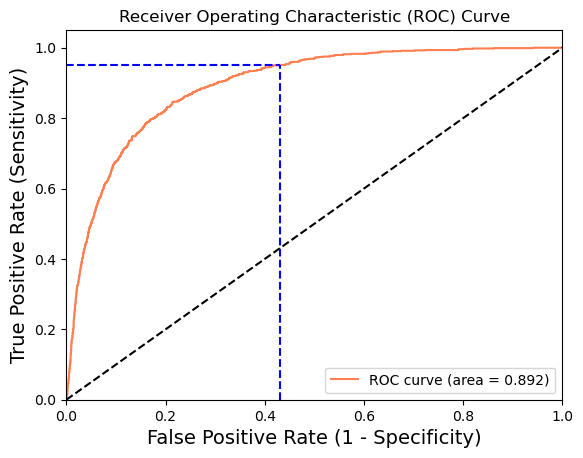

Using a threshold of 0.049 guarantees a sensitivity of 0.951 and a specificity of 0.569, i.e., a false positive rate of 43.06%.


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



# Split data into training and testing sets with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions and calculate predicted probabilities
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

# Find the threshold index for a 0.95 sensitivity
idx = np.min(np.where(tpr > 0.95))

# Print results
print("Train/Test split results:")
print(logreg.__class__.__name__ + " accuracy is %.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__ + " log_loss is %.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__ + " AUC is %.3f" % auc_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1 - fpr[idx]) +
      ", i.e., a false positive rate of %.2f%%." % (np.array(fpr[idx]) * 100))



In [82]:
X

,age,default,contact,duration,campaign,pdays,previous,cons.conf.idx,job_admin.,job_admin_and_unemployed,...,job_retired,job_student,education_4y_and_high_school,education_9y_6y_and_professional,education_illiterate,education_university_and_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,average_combined
0,56,0,0,261,1,0,0,-36.4,0,0,...,0,0,1,0,0,0,0,1,0,1322.73775
1,57,-1,0,149,1,0,0,-36.4,0,0,...,0,0,1,0,0,0,0,1,0,1322.73775
2,37,0,0,226,1,0,0,-36.4,0,0,...,0,0,1,0,0,0,0,1,0,1322.73775
3,40,0,0,151,1,0,0,-36.4,1,0,...,0,0,0,1,0,0,0,1,0,1322.73775
4,56,0,0,307,1,0,0,-36.4,0,0,...,0,0,1,0,0,0,0,1,0,1322.73775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,334,1,0,0,-50.8,0,0,...,1,0,0,1,0,0,0,1,0,1264.57375
41184,46,0,1,383,1,0,0,-50.8,0,0,...,0,0,0,1,0,0,0,1,0,1264.57375
41185,56,0,1,189,2,0,0,-50.8,0,0,...,1,0,0,0,0,1,0,1,0,1264.57375
41186,44,0,1,442,1,0,0,-50.8,0,0,...,0,0,0,1,0,0,0,1,0,1264.57375


In [83]:
from sklearn.model_selection import cross_val_score
# Oluşturulan Logistic Regression modeli
logreg = LogisticRegression()

# 10-katlı çapraz doğrulama ile modelin performansını ölçümleme
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

# Sonuçları ekrana yazdırma
print('10-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


10-fold cross-validation results:
LogisticRegression average accuracy is 0.889
LogisticRegression average log_loss is 0.290
LogisticRegression average auc is 0.853


In [84]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

logreg = LogisticRegression()

results = cross_validate(logreg, X, y, cv=20, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(logreg.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.896 (+/-0.028)
LogisticRegression average log_loss: 0.272 (+/-0.100)
LogisticRegression average auc: 0.874 (+/-0.072)


In [85]:
results = cross_validate(logreg, X, y, cv=50, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(logreg.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

K-fold cross-validation results:
LogisticRegression average accuracy: 0.899 (+/-0.027)
LogisticRegression average log_loss: 0.256 (+/-0.075)
LogisticRegression average auc: 0.886 (+/-0.073)


NameError: name 'precision_score' is not defined

##GridSearchCV evaluating using multiple scorers simultaneously

best params: LogisticRegression(C=1.50001)
best params: {'C': 1.50001}
best score: 0.8928078293875229


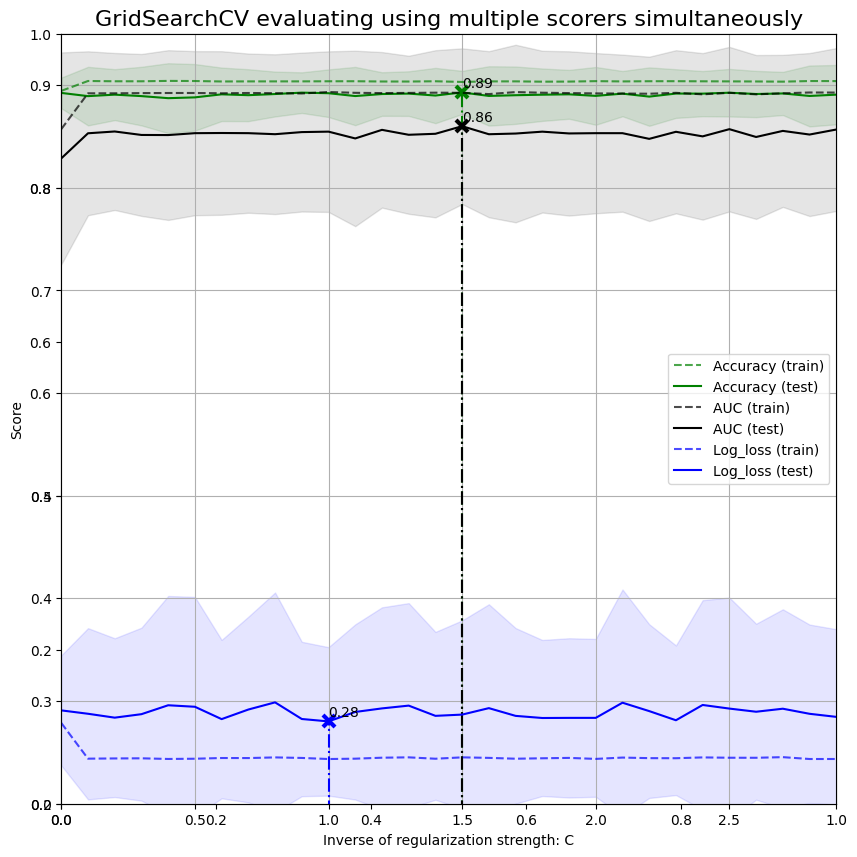

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(logreg, return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max())
ax.set_ylim(0.20, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# Gerekli kütüphaneleri içe aktarıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# Basit bir modeli tanımlıyoruz
C = np.arange(1e-05, 5.5, 0.1)  # C parametresi aralığı
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}  # Kullanılacak skorlama metrikleri
log_reg = LogisticRegression()  # Lojistik Regresyon modeli

# Basit ön işleme yöntemlerini tanımlıyoruz
std_scale = StandardScaler(with_mean=False, with_std=False)  # Standartlaştırma işlemi
# std_scale = StandardScaler()  # Alternatif bir standartlaştırma seçeneği

# Tekrarlı Stratified K Fold yöntemini tanımlıyoruz
n_folds = 5
n_repeats = 5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

# Basit bir boru hattı oluşturuyoruz ve GridSearchCV'yi tanımlıyoruz
log_clf_pipe = Pipeline(steps=[('scale', std_scale), ('clf', log_reg)])  # Standartlaştırma ve Lojistik Regresyon'u birleştirme
log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')  # C parametresi için GridSearchCV

# Modeli verilerle eğitiyoruz
log_clf.fit(X_train, y_train)
results = log_clf.cv_results_

# Test verileri üzerinde modeli değerlendiriyoruz
test_score = log_clf.score(X_test, y_test)

# Sonuçları yazdırıyoruz
print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('test score:', test_score)  # Test verileri üzerindeki skoru yazdırıyoruz
print('='*20)

# Skorları görselleştiriyoruz
plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max())
ax.set_ylim(0.35, 0.95)

X_axis = np.array(results['param_clf__C'].data, dtype=float)  # Parametre C değerleri

# Skorları çizdiriyoruz
for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

# Bu kod, Lojistik Regresyon modelinin hiperparametre optimizasyonunu gerçekleştirir
# ve sonuçları görselleştirir.


In [ ]:
from sklearn.model_selection import train_test_split

# X: Özellik matrisi, y: Hedef değişken vektörü
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Eğitim verileri, y_train: Eğitim hedef değişkeni
# X_test: Test verileri, y_test: Test hedef değişkeni


### Destek Vektör Makineleri (SVM):

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# svm = SVC()
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
# grid_svm.fit(X_train, y_train)

# best_svm = grid_svm.best_estimator_
# best_score_svm = grid_svm.best_score_
# test_score_svm = best_svm.score(X_test, y_test)

# print("SVM Results:")
# print("Best Parameters:", best_svm)
# print("Best Cross-Validation Score:", best_score_svm)
# print("Test Score:", test_score_svm)


## Karar Ağaçları

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# tree = DecisionTreeClassifier()
# tree.fit(X_train, y_train)

# train_score_tree = tree.score(X_train, y_train)
# test_score_tree = tree.score(X_test, y_test)

# print("Decision Tree Results:")
# print("Train Score:", train_score_tree)
# print("Test Score:", test_score_tree)


## Rastgele Ormanlar

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Veriyi train ve test olarak ayırma
X = training_data.drop(columns=['y'])  # Veri sütunları (hedef sütunu hariç)
y = training_data['y']  # Hedef sütunu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturma
model = RandomForestClassifier(criterion='gini',
                             n_estimators=800,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

# Hiperparametre ayarlaması için GridSearchCV veya RandomizedSearchCV kullanabilirsiniz

# Modeli eğitme
model.fit(X_train, y_train)

# Çapraz doğrulama ile modelin performansını değerlendirme
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Test verileri üzerinde modelin performansını değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)


Cross-Validation Scores: [0.91107739 0.91092564 0.91213961 0.91502276 0.91836115]
Mean CV Score: 0.91350531107739
Test Accuracy: 0.9149065307113377
Test Precision: 0.6647887323943662
Test Recall: 0.5048128342245989
Test F1 Score: 0.5738601823708206


In [ ]:
# Out-of-Bag skoru yazdırma
print("Out-of-Bag Score: %.4f" % model.oob_score_)

Out-of-Bag Score: 0.9141


In [ ]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']),
           pd.DataFrame(model.feature_importances_, columns = ['importance'])),
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
3,campaign,0.373235
21,NaN,0.211439
0,default,0.088781
7,job_admin.,0.085331
5,previous,0.054085
20,average_combined,0.037839
4,pdays,0.035095
6,cons.conf.idx,0.015515
2,duration,0.014442
19,poutcome_success,0.009551


## K-En yakın komşular

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7]}

grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='accuracy', cv=5)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
best_score_knn = grid_knn.best_score_
test_score_knn = best_knn.score(X_test, y_test)

print("K-Nearest Neighbors Results:")
print("Best Parameters:", best_knn)
print("Best Cross-Validation Score:", best_score_knn)
print("Test Score:", test_score_knn)


K-Nearest Neighbors Results:
Best Parameters: KNeighborsClassifier(n_neighbors=7)
Best Cross-Validation Score: 0.9023065250379363
Test Score: 0.9036173828599174
